**Gabriel Abdulai
*Exploring supervised machine learning algorithm for understanding 
insights in my yearly utilities data
#I want to develop a supervised machine learning algorithm that can predict my monthly electricity bill using
#other utitilites at home

In [25]:
#import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [26]:
#import dataset from 
df_utl = pd.read_csv('gab_utilities.csv')
df_utl.head()

,ID,Month,Kwh,Power_Cost,Gallons,Water_Cost,Sewer_CCF,Year
0,1,January,936,123.99,2244,25.69,2,2019
1,2,February,669,101.84,2244,25.69,3,2019
2,3,March,889,120.99,1496,25.69,2,2019
3,4,April,820,86.60,2244,25.97,2,2019
4,5,May,513,58.86,2244,25.97,1,2019


In [27]:
#data information
df_utl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          24 non-null     int64  
 1   Month       24 non-null     object 
 2   Kwh         24 non-null     int64  
 3   Power_Cost  24 non-null     float64
 4   Gallons     24 non-null     int64  
 5   Water_Cost  24 non-null     float64
 6   Sewer_CCF   24 non-null     int64  
 7   Year        24 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.6+ KB


In [28]:
#descriptive stats
df_utl.describe()

,ID,Kwh,Power_Cost,Gallons,Water_Cost,Sewer_CCF,Year
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.500000,762.666667,95.618750,2150.500000,29.025000,2.916667,2019.500000
std,7.071068,233.103199,23.553649,741.877114,5.032763,1.100066,0.510754
min,1.000000,425.000000,56.460000,748.000000,20.700000,1.000000,2019.000000
25%,6.750000,531.000000,76.347500,1496.000000,25.500000,2.000000,2019.000000
50%,12.500000,785.500000,95.845000,2244.000000,25.970000,3.000000,2019.500000
75%,18.250000,954.750000,117.050000,2244.000000,30.580000,4.000000,2020.000000
max,24.000000,1174.000000,135.050000,3740.000000,40.250000,5.000000,2020.000000


In [29]:
#find correlation between parameters
df_utl.corr()

,ID,Kwh,Power_Cost,Gallons,Water_Cost,Sewer_CCF,Year
ID,1.000000,-0.149562,-0.283257,0.424666,0.625436,0.447155,0.866778
Kwh,-0.149562,1.000000,0.876868,0.090268,0.106859,0.357983,-0.245039
Power_Cost,-0.283257,0.876868,1.000000,-0.040450,-0.021193,0.256295,-0.298544
Gallons,0.424666,0.090268,-0.040450,1.000000,0.938409,0.707329,0.300399
Water_Cost,0.625436,0.106859,-0.021193,0.938409,1.000000,0.805817,0.446537
Sewer_CCF,0.447155,0.357983,0.256295,0.707329,0.805817,1.000000,0.232147
Year,0.866778,-0.245039,-0.298544,0.300399,0.446537,0.232147,1.000000


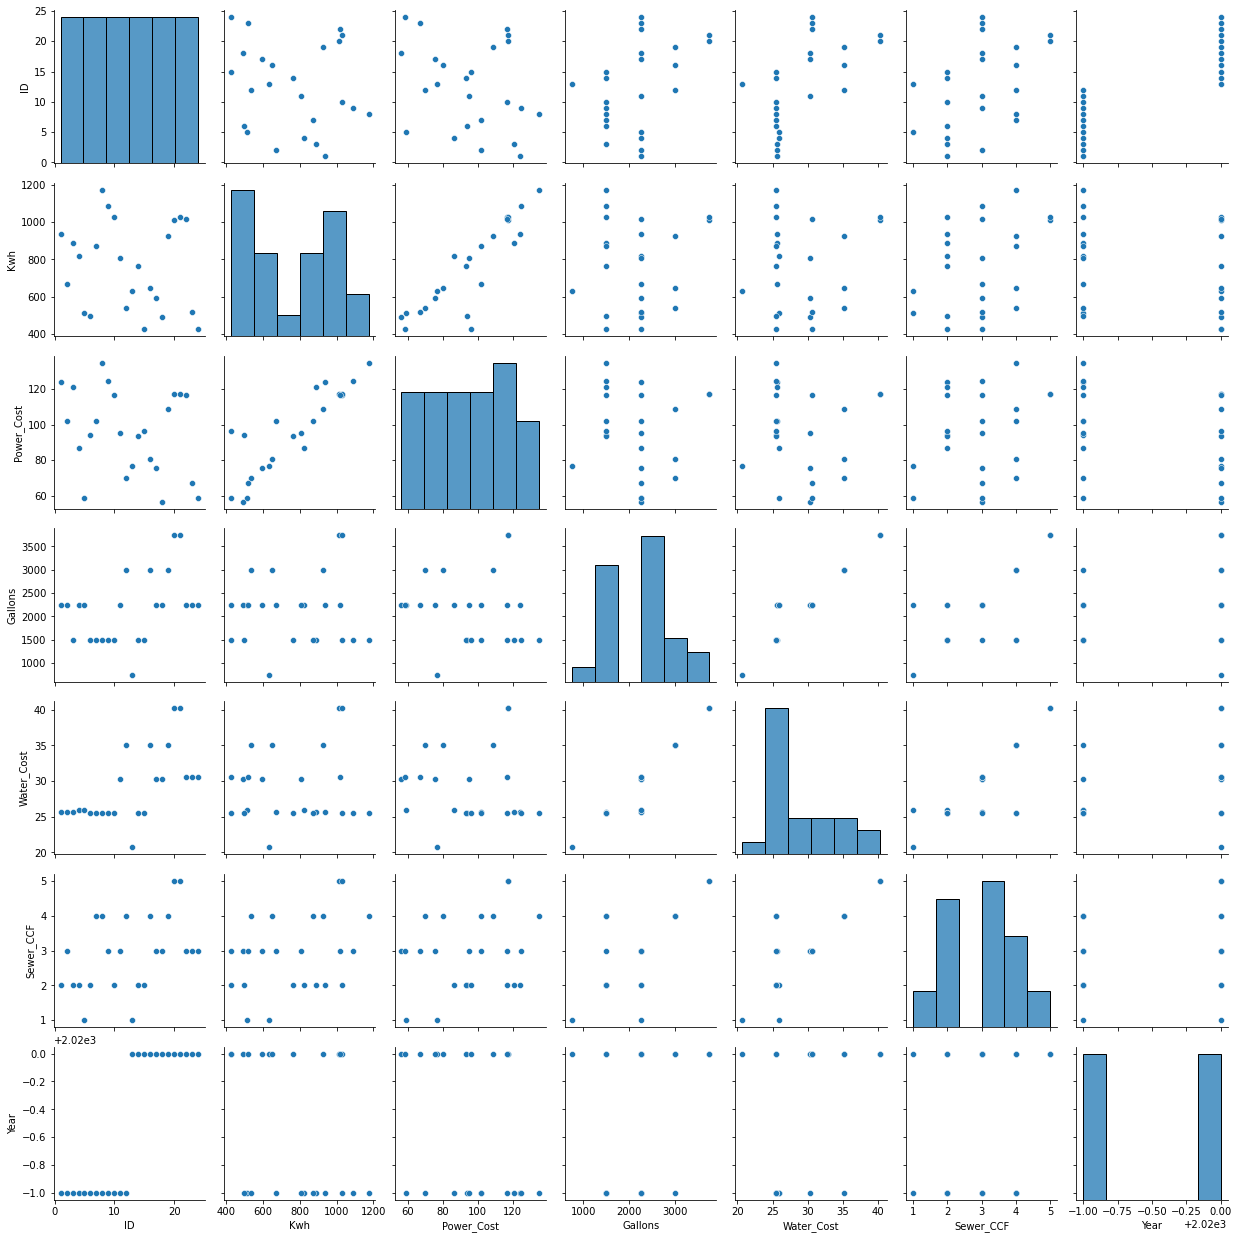

In [30]:
#plot data
import seaborn as sns
sns.pairplot(data=df_utl)

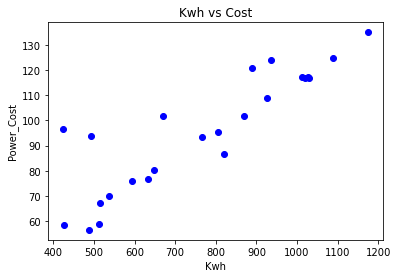

In [31]:
#scatter plot
plt.xlabel('Kwh') #kilo watt hour
plt.ylabel('Power_Cost') #cost of the power
plt.title('Kwh vs Cost')
plt.scatter(df_utl["Kwh"], df_utl['Power_Cost'], c = "b")

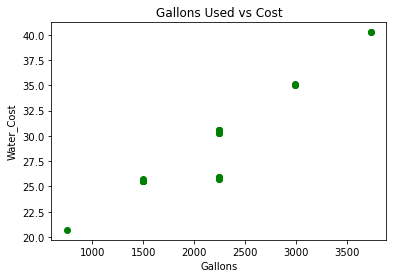

In [32]:
#scatter plot
plt.xlabel('Gallons') #kilo watt hour
plt.ylabel('Water_Cost') #cost of the power
plt.title('Gallons Used vs Cost')
plt.scatter(df_utl["Gallons"], df_utl['Water_Cost'], c = "g")

In [33]:
#develop regression model
X = df_utl.drop(['ID', 'Year', 'Month', 'Power_Cost'], axis = 1)
y = df_utl['Power_Cost']

In [34]:
print(X)

     Kwh  Gallons  Water_Cost  Sewer_CCF
0    936     2244       25.69          2
1    669     2244       25.69          3
2    889     1496       25.69          2
3    820     2244       25.97          2
4    513     2244       25.97          1
5    493     1496       25.50          2
6    870     1496       25.50          4
7   1174     1496       25.50          4
8   1088     1496       25.50          3
9   1029     1496       25.50          2
10   806     2244       30.30          3
11   536     2992       35.09          4
12   632      748       20.70          1
13   765     1496       25.50          2
14   425     1496       25.50          2
15   648     2992       35.08          4
16   594     2244       30.30          3
17   489     2244       30.30          3
18   927     2992       35.08          4
19  1011     3740       40.25          5
20  1028     3740       40.25          5
21  1019     2244       30.58          3
22   516     2244       30.58          3
23   427     224

In [38]:
#train model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
#linear regression
from sklearn.linear_model import LinearRegression

#train model
lin_reg = LinearRegression()
regressor = lin_reg.fit(X_train, y_train)

#make predicitons
y_pred = regressor.predict(X_test)

In [40]:
#how accurate is my regression model

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 8.200696576780961
Mean Squared Error: 230.37641793423995
Root Mean Squared Error: 2.863685837654152


In [47]:
#knn
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors = 5)
regressor = knn_reg.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 6.3867999999999965
Mean Squared Error: 44.61171919999996
Root Mean Squared Error: 2.5272119024727617


In [49]:
#radom forest

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state = 42, n_estimators = 500)

regressor = rf_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 6.4589280000001565
Mean Squared Error: 116.50683796240124
Root Mean Squared Error: 2.5414421102988274


In [50]:
#support vector regressiom

from sklearn import svm
svm_reg = svm.SVR()

regressor = svm_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 18.342602488448822
Mean Squared Error: 490.4435921951643
Root Mean Squared Error: 4.282826460230303


In [55]:
#test model 
df_utl.iloc[10]


ID                  11
Month         November
Kwh                806
Power_Cost       95.25
Gallons           2244
Water_Cost        30.3
Sewer_CCF            3
Year              2019
Name: 10, dtype: object

In [54]:
#linear regression
from sklearn.linear_model import LinearRegression

#train model
lin_reg = LinearRegression()
regressor = lin_reg.fit(X_train, y_train)

rec = (X.values[10]. reshape(1, -1))
predict_cost = regressor.predict(rec)
print(predict_cost)

[97.57059796]
